In [23]:
import os
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('model/',  compile=False)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 307, 230, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 307, 230, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 307, 230, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 153, 115, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 153, 115, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 76, 57, 64)       0         
 2D)                                                  

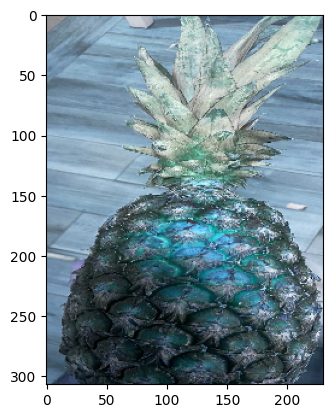

In [30]:
image = cv2.imread('Abacaxi.JPEG', cv2.IMREAD_COLOR)
half = cv2.resize(image, (230, 307))

cv2.imwrite('test-maca.jpg', half)
plt.imshow(half)
plt.show()

# from keras.preprocessing import image

# img_width, img_height = 307, 230
# img = image.load_img('test-maca.jpg', target_size = (img_width, img_height))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis = 0)


In [31]:
import numpy as np

y_prob = model.predict(np.expand_dims(half, axis=0))
y_classes = y_prob.argmax(axis=-1)

1/1 [==============================] - 0s 48ms/step


In [32]:
y_classes

array([4], dtype=int64)

In [ ]:
import google.generativeai as genai
import os
genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("Write a story about a magic backpack.")
print(response.text)